In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Multivariate Gaussian function

$f(\mathbf{x}, \boldsymbol{\mu}, \Sigma) = (2\pi)^{-M/2}|\Sigma|^{-1/2}~e^{\frac{-1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})}$


In [ ]:
def gaussian(x, mu, cov):
    # x and mu should be vectors in numpy, shape=(2,)
    # cov should be a matrix in numpy, shape=(2,2)
    M = 2
    scale = (2*np.pi)**(-M/2)*np.linalg.det(cov)**(-1/2)
    return scale*np.exp(-(1/2)*(x-mu).T @ np.linalg.inv(cov) @ (x-mu))

## Plot Gaussian contours function

In [ ]:
def plot_gaussian(mu, cov, x1_min=-10, x1_max=10, x2_min=-10, x2_max=10, color=None):
    # x and mu should be vectors in numpy, shape=(2,)
    # cov should be a matrix in numpy, shape=(2,2)

    x1_values = np.linspace(x1_min, x1_max, 101)
    x2_values = np.linspace(x2_min, x2_max, 101)

    x1_grid, x2_grid = np.meshgrid(x1_values,x2_values)

    M,N = x1_grid.shape
    y_grid = np.zeros((M,N))

    x = np.zeros((2,))

    for i in range(M):
        for j in range(N):
            x[0] = x1_grid[i,j]
            x[1] = x2_grid[i,j]

            y_grid[i,j] = gaussian(x, mu, cov)

    plt.contour(x1_grid, x2_grid, y_grid, colors=color)

## Load data
Note: The code assumes that the data file is in the same folder as the jupyter notebook. In Google colab, you can upload the file directly into the workspace by in the Files tab on the left.

In [ ]:
X = np.loadtxt("./gmm_data.csv", delimiter=",")
print(X.shape)

(2000, 2)


## Initial parameters

In [ ]:
K=4

mu_list = []
sigma_list = []
pi_list = []

for k in range(K):
    mu_list.append((k+1)*np.ones((2,)))
    sigma_list.append(np.eye(2))
    pi_list.append(1/K)

## Plot data with initial Gaussian contours

Text(0.5, 1.0, 'Iteration 1')

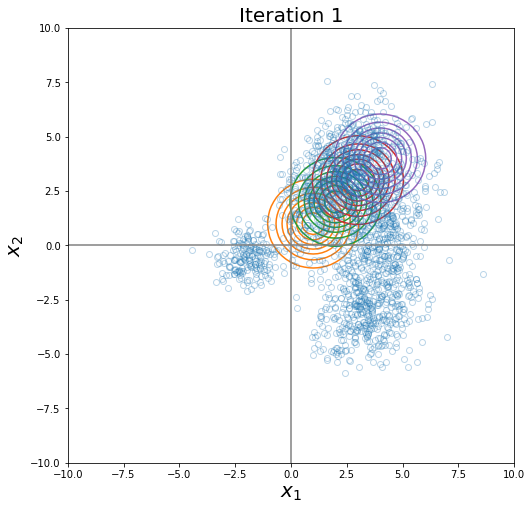

In [ ]:
# Square figure size
plt.figure(figsize=(8,8))

# Plot points
plt.plot(X[:,0], X[:,1], 'o', markerfacecolor="None", alpha=0.3)

# Plot K Gaussians
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for k in range(K):
    plot_gaussian(mu_list[k], sigma_list[k], color=colors[k])

# Axes
plt.gca().axhline(y=0, color='gray')
plt.gca().axvline(x=0, color='gray')

# Labels
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title("Iteration 1", fontsize=20)

### Visualizing the EM Updates

In [ ]:
N = X.shape[0]
num_iter = 100

# store mu and sigma values for plotting
mu_lists = []
sigma_lists = []

for iter in range(num_iter):
    # E-step
    eta = np.zeros((N,K))
    for i in range(N):
        for k in range(K):
            eta[i,k] = pi_list[k] * gaussian(X[i], mu_list[k], sigma_list[k])
        eta[i,:] = eta[i,:] / sum(eta[i,:])

    # M-step
    for k in range(K):
        eta_k = np.reshape(eta[:,k], (2000,1))
        N_k = sum(eta_k)
        mu_list[k] = sum(X * eta_k) / N_k
        var_k = X - mu_list[k]
        sigma_list[k] = np.matmul((var_k * eta_k).T, var_k) / N_k
        pi_list[k] = N_k / N
    
    mu_lists.append(tuple(mu_list))
    sigma_lists.append(tuple(sigma_list))

Text(0.5, 1.0, 'Iteration 1')

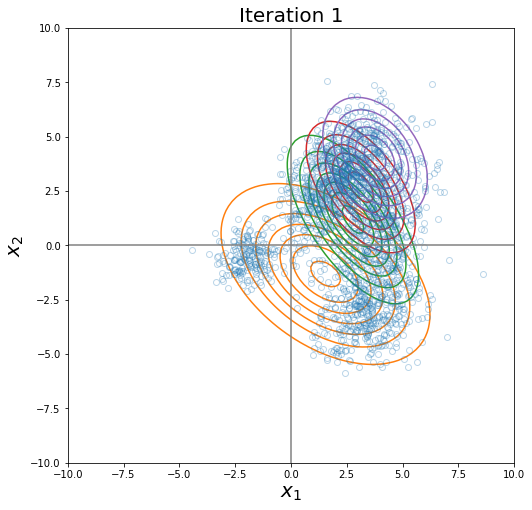

In [ ]:
## plot after iter 1
iter = 1
# Square figure size
plt.figure(figsize=(8,8))

# Plot points
plt.plot(X[:,0], X[:,1], 'o', markerfacecolor="None", alpha=0.3)

# Plot K Gaussians
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for k in range(K):
    plot_gaussian(mu_lists[iter-1][k], sigma_lists[iter-1][k], color=colors[k])

# Axes
plt.gca().axhline(y=0, color='gray')
plt.gca().axvline(x=0, color='gray')

# Labels
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title("Iteration 1", fontsize=20)

Text(0.5, 1.0, 'Iteration 30')

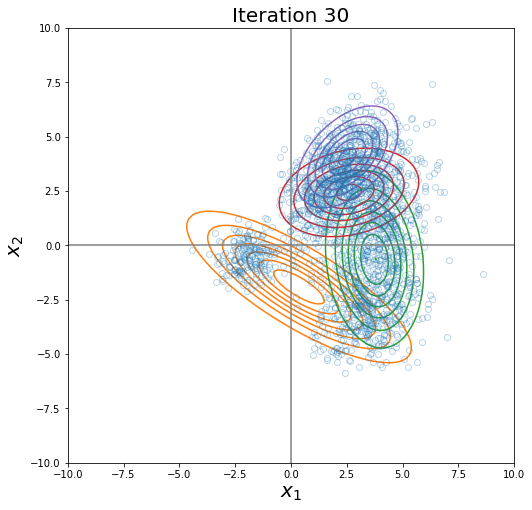

In [ ]:
## plot after iter 30
iter = 30
# Square figure size
plt.figure(figsize=(8,8))

# Plot points
plt.plot(X[:,0], X[:,1], 'o', markerfacecolor="None", alpha=0.3)

# Plot K Gaussians
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for k in range(K):
    plot_gaussian(mu_lists[iter-1][k], sigma_lists[iter-1][k], color=colors[k])

# Axes
plt.gca().axhline(y=0, color='gray')
plt.gca().axvline(x=0, color='gray')

# Labels
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title("Iteration 30", fontsize=20)

Text(0.5, 1.0, 'Iteration 100')

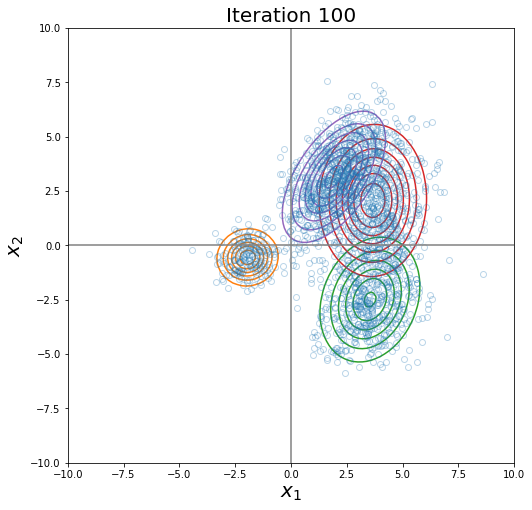

In [ ]:
## plot after iter 100
iter = 100
# Square figure size
plt.figure(figsize=(8,8))

# Plot points
plt.plot(X[:,0], X[:,1], 'o', markerfacecolor="None", alpha=0.3)

# Plot K Gaussians
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for k in range(K):
    plot_gaussian(mu_lists[iter-1][k], sigma_lists[iter-1][k], color=colors[k])

# Axes
plt.gca().axhline(y=0, color='gray')
plt.gca().axvline(x=0, color='gray')

# Labels
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title("Iteration 100", fontsize=20)